Q1. What is the mathematical formula for a linear SVM?

In [ ]:
 """
 The mathematical formula for linear SVM : 
 y= W^T * x + b.
 
 W - slope
 x= is datapoint
 b= intercept.                         

Q2. What is the objective function of a linear SVM?

In [ ]:
"""
The mian objective of support vector macchine to solve classiication problem by drawing best fit line along with two marginal
plane which pass through nearest data point of categories (c1) and categories (c2) called support vector.and 
make sure that the distance between two marginal should be maximum.
"""

Q3. What is the kernel trick in SVM?

In [ ]:
"""
kernal trick in SVM is a method used to take data as input and transform it into the required from of processing data.
"kernal" is used to set mathematical function used in support vector machine providing the window to manipulate the data.
Generally transforms the training set of data so that non-linear decision surface is able to transform to a linear equation
in higher number of dimenstion space.
"""

Q4. What is the role of support vectors in SVM Explain with example

In [ ]:
"""
In the support vector machine(SVM), support vactor play a curcial role in defining the decision boundary between different 
classes.
The main idea behind SVM is to find a hyperplane that maximumally separates the classes in the features space. int he most case,
the data point are not perfectly separate, and there may be some or noise in the data. In this SVM handle this case by allowing 
a certian amount of misclassification or marginal violations.
"""

Q5. Illustrate with examples and graphs of Hyperplane, Marginal plane, Soft margin and Hard margin in
SVM?

In [ ]:
"""
Hyperplane: The hyperplane is the decision boundary that separate tha classes. in a binary 
classification probelm, the hyperplane is a line in a 2D features sapce, or 3D features space and hyperplane is higher dimension spaces. it represents by the equation.

MArginal plane: The marginal plane is a parallel plane that runs closest to the hyperplane and touches the support vector. it helps to find margin in SVM.

Soft margin: The dataset have some misclassified but still model can predict correct datapoint are called soft margin.
             IT introduces a penalty term(c) to the objective function, balancing the margin size and the number of missclassified points,
             
Hard margin: If the dataset are clearly seprate that we called as hard margin.


Q6. SVM Implementation through Iris dataset.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.svm import SVC
from sklearn.datasets import load_iris

In [2]:
data=load_iris()

In [3]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
df=pd.DataFrame(data.data, columns=data.feature_names)

In [5]:
df['target']=data.target

In [6]:
df.to_csv('iris.csv')

In [7]:
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [8]:
x=df.drop(['target'], axis=1)

In [9]:
y=df['target']

In [10]:
y.tail()

145    2
146    2
147    2
148    2
149    2
Name: target, dtype: int64

In [11]:
y.shape

(150,)

In [12]:
x.shape

(150, 4)

~ Load the iris dataset from the scikit-learn library and split it into a training set and a testing setl

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train, x_test, y_train , y_test=train_test_split(x,y, test_size=0.33, random_state=42)

In [15]:
x_train.shape, x_test.shape, y_train.shape , y_test.shape

((100, 4), (50, 4), (100,), (50,))

~ Train a linear SVM classifier on the training set and predict the labels for the testing setl

In [16]:
from sklearn.svm import SVC

In [17]:
obj_svm=SVC(kernel='linear')

In [18]:
obj_svm.fit(x_train, y_train)

SVC(kernel='linear')

In [19]:
y_pred=obj_svm.predict(x_test)

In [20]:
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 2, 2, 1, 2])

~ Compute the accuracy of the model on the testing setl

In [21]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [22]:
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

1.0
[[19  0  0]
 [ 0 15  0]
 [ 0  0 16]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        16

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



~ Plot the decision boundaries of the trained model using two of the featuresl

In [23]:
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

<AxesSubplot: xlabel='sepal length (cm)', ylabel='petal length (cm)'>

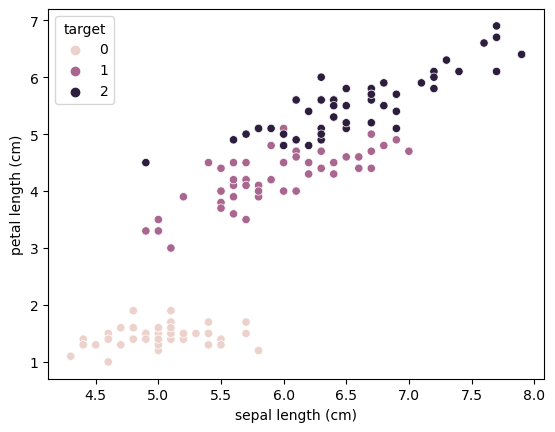

In [25]:
sns.scatterplot(x=df['sepal length (cm)'], y=df['petal length (cm)'], hue=df['target'])

~ Try different values of the regularisation parameter C and see how it affects the performance of
the model.

In [49]:
param_grid={
    'C':[0.1, 1, 10, 100]
}

In [50]:
from sklearn.model_selection import GridSearchCV

In [51]:
grid=GridSearchCV(obj_svm, param_grid=param_grid, cv=2, verbose=3.0)

In [52]:
grid.fit(x_train, y_train)

Fitting 2 folds for each of 4 candidates, totalling 8 fits
[CV 1/2] END .............................C=0.1;, score=0.900 total time=   0.0s
[CV 2/2] END .............................C=0.1;, score=0.960 total time=   0.0s
[CV 1/2] END ...............................C=1;, score=0.960 total time=   0.0s
[CV 2/2] END ...............................C=1;, score=0.980 total time=   0.0s
[CV 1/2] END ..............................C=10;, score=0.920 total time=   0.0s
[CV 2/2] END ..............................C=10;, score=0.980 total time=   0.0s
[CV 1/2] END .............................C=100;, score=0.940 total time=   0.0s
[CV 2/2] END .............................C=100;, score=1.000 total time=   0.0s


GridSearchCV(cv=2, estimator=SVC(kernel='linear'),
             param_grid={'C': [0.1, 1, 10, 100]}, verbose=3.0)

In [53]:
grid.best_params_

{'C': 1}

In [54]:
y_pre=grid.predict(x_test)

In [55]:
y_pre

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 2, 2, 1, 2])

In [56]:
print(accuracy_score(y_test, y_pre))
print(confusion_matrix(y_test, y_pre))
print(classification_report(y_test, y_pre))

1.0
[[19  0  0]
 [ 0 15  0]
 [ 0  0 16]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        16

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

